<a href="https://colab.research.google.com/github/dothuanueh/Project-AI/blob/main/ASL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from keras import layers
from keras.preprocessing.image import ImageDataGenerator,load_img
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation,Dropout,Flatten,Dense
from keras.optimizers import Adam
import tensorflow as tf

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
url="/content/drive/MyDrive/data"
img_size=300

In [4]:
train_datagen=ImageDataGenerator(rescale=1./255, shear_range=0.2,zoom_range=0.2, horizontal_flip=True, validation_split=0.2)
test_datagen=ImageDataGenerator(rescale=1./255,validation_split=0.2)
#Create datasets
train_datagen=train_datagen.flow_from_directory(url, target_size=(img_size,img_size),subset='training',batch_size=64)
test_datagen=test_datagen.flow_from_directory(url, target_size=(img_size,img_size),subset='training',batch_size=64)

Found 2814 images belonging to 26 classes.
Found 2814 images belonging to 26 classes.


In [5]:
model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(16, (3,3), activation ='relu', input_shape=(img_size,img_size,3)),
        tf.keras.layers.Conv2D(16, (3,3), activation ='relu'),
        tf.keras.layers.Conv2D(16, (3,3), activation ='relu'),
        tf.keras.layers.MaxPool2D((2,2)),
        tf.keras.layers.Conv2D(32, (3,3), activation ='relu'),
        tf.keras.layers.Conv2D(32, (3,3), activation ='relu'),
        tf.keras.layers.Conv2D(32, (3,3), activation ='relu'),
        tf.keras.layers.MaxPool2D((2,2)),
        tf.keras.layers.Conv2D(64, (3,3), activation ='relu'),
        tf.keras.layers.Conv2D(64, (3,3), activation ='relu'),
        tf.keras.layers.Conv2D(64, (3,3), activation ='relu'),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(26, activation='softmax')
])


In [6]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(),loss='categorical_crossentropy',metrics='accuracy')
model_history=model.fit(train_datagen,epochs=20,validation_data=(test_datagen),verbose=2)

Epoch 1/20
44/44 - 1884s - loss: 2.6220 - accuracy: 0.2697 - val_loss: 0.3005 - val_accuracy: 0.9502 - 1884s/epoch - 43s/step
Epoch 2/20
44/44 - 98s - loss: 0.2758 - accuracy: 0.9261 - val_loss: 0.0450 - val_accuracy: 0.9840 - 98s/epoch - 2s/step
Epoch 3/20
44/44 - 99s - loss: 0.0631 - accuracy: 0.9822 - val_loss: 0.0030 - val_accuracy: 1.0000 - 99s/epoch - 2s/step
Epoch 4/20
44/44 - 98s - loss: 0.0243 - accuracy: 0.9943 - val_loss: 0.0076 - val_accuracy: 0.9968 - 98s/epoch - 2s/step
Epoch 5/20
44/44 - 95s - loss: 0.0374 - accuracy: 0.9897 - val_loss: 0.0020 - val_accuracy: 0.9996 - 95s/epoch - 2s/step
Epoch 6/20
44/44 - 99s - loss: 0.0315 - accuracy: 0.9918 - val_loss: 0.0127 - val_accuracy: 0.9957 - 99s/epoch - 2s/step
Epoch 7/20
44/44 - 99s - loss: 0.0218 - accuracy: 0.9936 - val_loss: 4.5210e-04 - val_accuracy: 0.9996 - 99s/epoch - 2s/step
Epoch 8/20
44/44 - 98s - loss: 0.0336 - accuracy: 0.9904 - val_loss: 3.5773e-04 - val_accuracy: 1.0000 - 98s/epoch - 2s/step
Epoch 9/20
44/44 - 

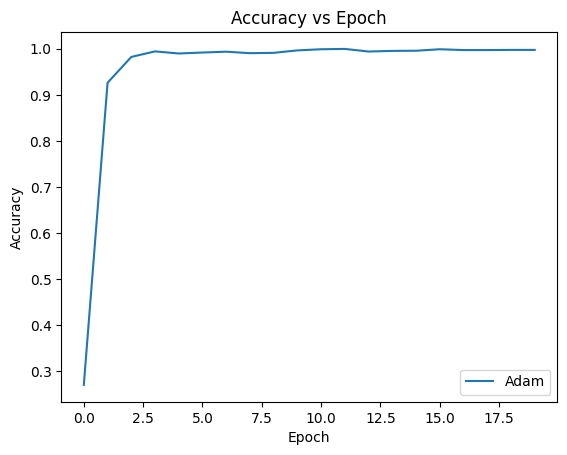

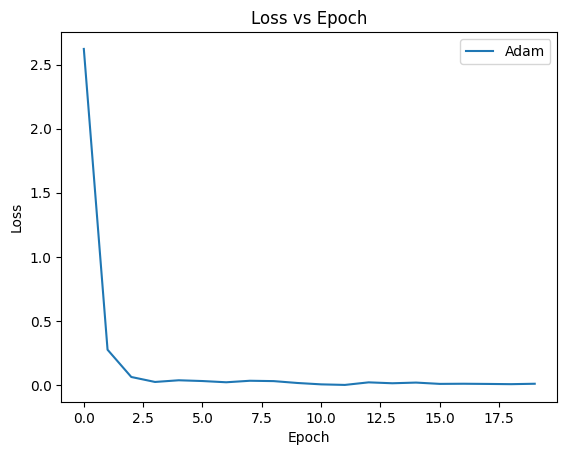

In [7]:
plt.plot(model_history.history['accuracy'],label='Adam')
plt.title('Accuracy vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(model_history.history['loss'],label='Adam')
plt.title('Loss vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [8]:
model_json=model.to_json()
with open('json_ASL.json','w') as json_file:
  json_file.write(model_json)
model.save('model_ASL.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [9]:
train_datagen.class_indices
from keras.models import load_model
from keras.preprocessing import image
from keras.utils import load_img,img_to_array
list=['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']

In [10]:
test_image=image.load_img('/content/F.jpg',target_size=(48,48))
plt.imshow(test_image)
test_image=image.img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
model=load_model('/content/model_ASL.h5')
result=model.predict(test_image)
print(result)
for i in range(len(result[0])):
  if (result[0][i]==1):
    print(list[i])
    break

FileNotFoundError: [Errno 2] No such file or directory: '/content/F.jpg'